In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Walmart Sales.csv")

# **EXPORATARY DATA ANALYSIS**
__________________________________________________________________________________________________________________________________________________
1. Checking Data
2. Confirming Missing Data
3. Discribing Other Information
4. Data Visualization

In [4]:
print(df.head())
print(df.tail())

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      A  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      B     Yangon        Member    Male   
4  373-73-7910      C     Yangon        Normal    Male   

             Product line  Unit price  Quantity       Date   Time  \
0       Health and beauty       74.69         7   1/5/2019  13:08   
1  Electronic accessories       15.28         5   3/8/2019  10:29   
2      Home and lifestyle       46.33         7   3/3/2019  13:23   
3       Health and beauty       58.22         8  1/27/2019  20:33   
4       Sports and travel       86.31         7   2/8/2019  10:37   

       Payment  Rating  
0      Ewallet     9.1  
1         Cash     9.6  
2  Credit card     7.4  
3      Ewallet     8.4  
4      Ewallet     5.3  
      Invoice ID Branch       City Customer type  Gender         Product line  \
995  

In [6]:
df.isnull().sum()

Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64

In [35]:
print(df.describe())

        Unit price     Quantity      Rating
count  1000.000000  1000.000000  1000.00000
mean     55.672130     5.510000     6.97270
std      26.494628     2.923431     1.71858
min      10.080000     1.000000     4.00000
25%      32.875000     3.000000     5.50000
50%      55.230000     5.000000     7.00000
75%      77.935000     8.000000     8.50000
max      99.960000    10.000000    10.00000


In [10]:
df.shape

(1000, 12)

In [12]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Date', 'Time', 'Payment',
       'Rating'],
      dtype='object')

### *4.1. Over All Visualization of Data*
_____________________________________________

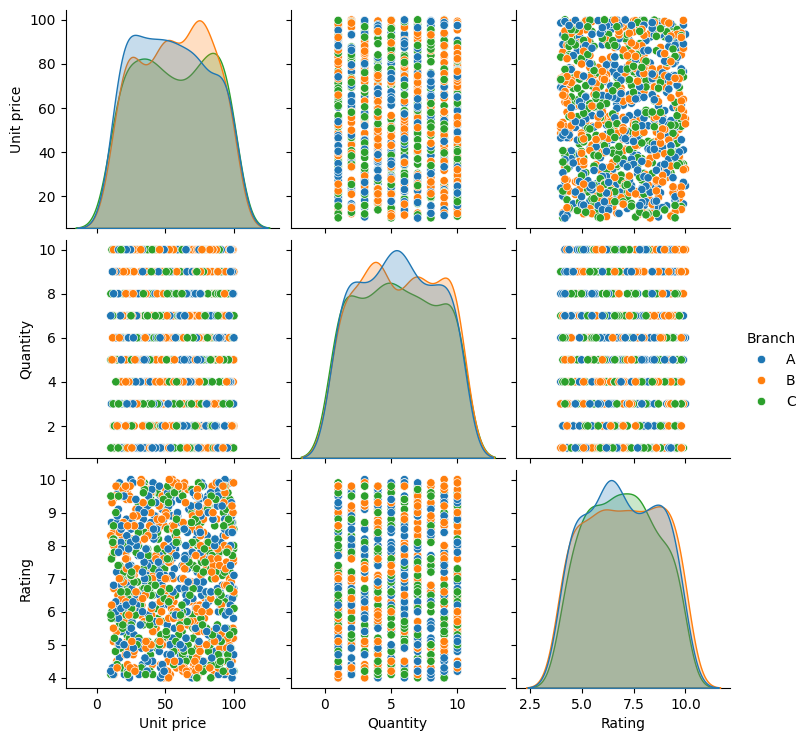

In [23]:
sns.pairplot(df, hue='Branch')

### *4.2. Rating Distribution*
_____________________________________________

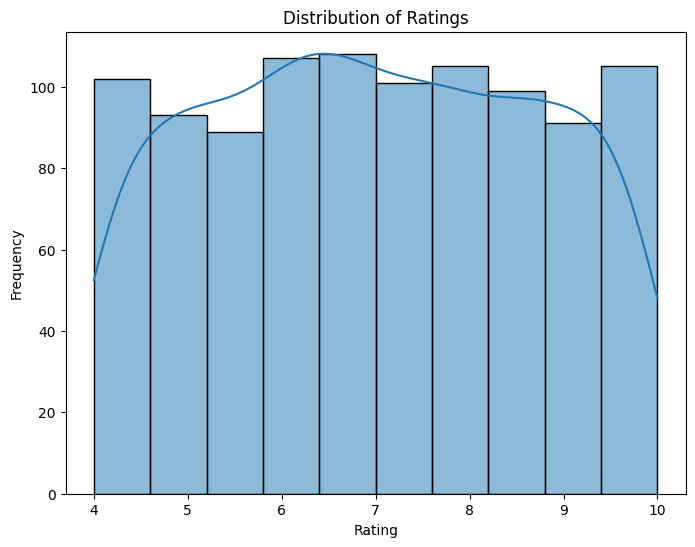

In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

### *4.3. Transaction Count Per Branch*
_________________________________________

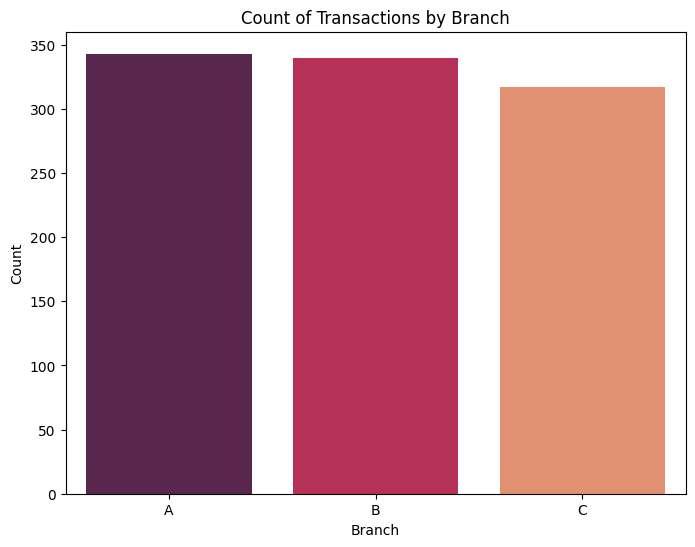

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Branch', data=df, hue='Branch', palette='rocket')
plt.title('Count of Transactions by Branch')
plt.xlabel('Branch')
plt.ylabel('Count')
plt.show()

### *4.4. Unit Price Per Product at Branch*
_________________________________________

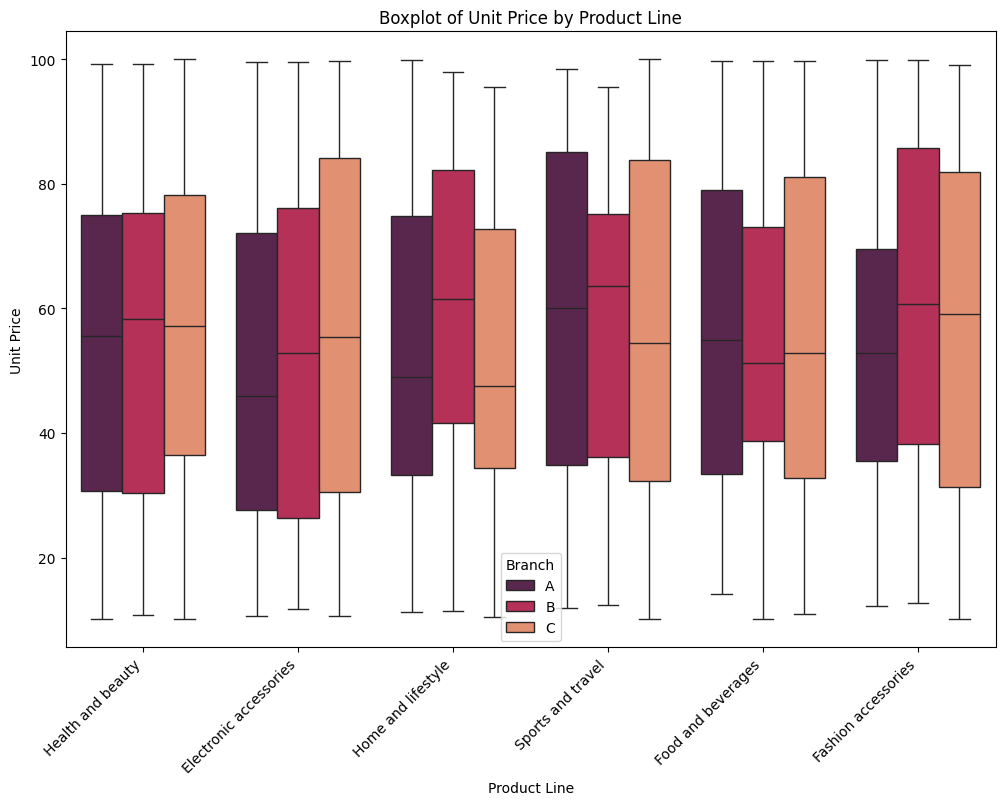

In [33]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Product line', y='Unit price', data=df, hue='Branch', palette='rocket')
plt.title('Boxplot of Unit Price by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Unit Price')
plt.xticks(rotation=45, ha='right')
plt.show()

# **A. PERFORMANCE OF SALE AT CITY AND BRANCH LEVEL** 
________________________________________________________________________________________

In [9]:
df['Total Revenue'] = df['Unit price'] * df['Quantity']
TotalSales = df.groupby(['City', 'Branch'])['Quantity'].sum().reset_index()

In [44]:
city_performance = df.groupby('City').agg({
    'Total Revenue': 'sum',
    'Quantity': 'sum',

}).reset_index()
branch_performance = df.groupby('Branch').agg({
    'Total Revenue': 'sum',
    'Quantity': 'sum',

}).reset_index()

#### *OUTPUT*

In [45]:
print("City Performance:")
print(city_performance)

print("\nBranch Performance:")
print(branch_performance)

City Performance:
        City  Total Revenue  Quantity
0   Mandalay      101140.64      1820
1  Naypyitaw      105303.53      1831
2     Yangon      101143.21      1859

Branch Performance:
  Branch  Total Revenue  Quantity
0      A      103763.00      1883
1      B      107567.19      1899
2      C       96257.19      1728


#### *VISULAIZATION*

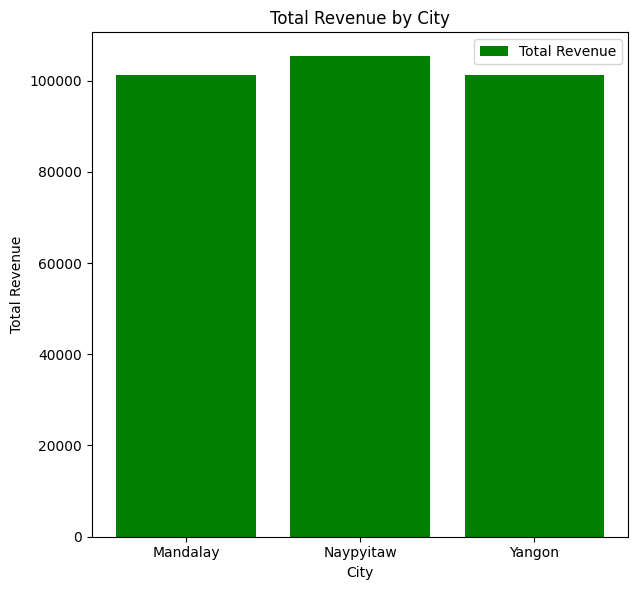

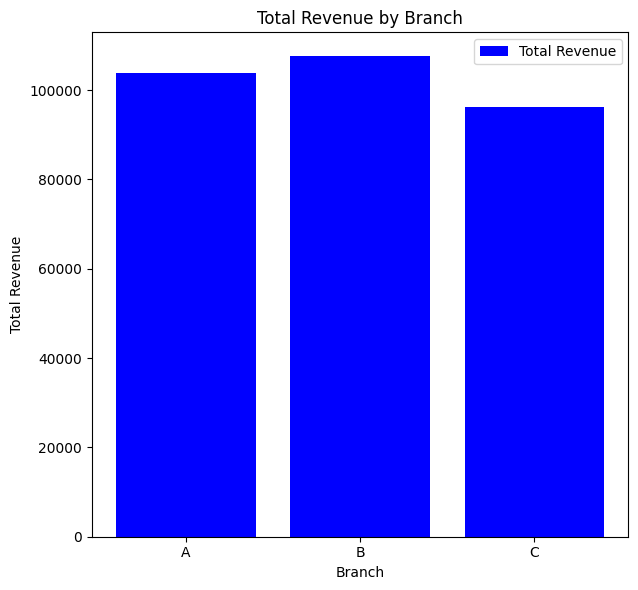

In [46]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(city_performance['City'], city_performance['Total Revenue'], color='Green', label='Total Revenue')
plt.title('Total Revenue by City')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(branch_performance['Branch'], branch_performance['Total Revenue'], color='Blue', label='Total Revenue')
plt.title('Total Revenue by Branch')
plt.xlabel('Branch')
plt.ylabel('Total Revenue')
plt.legend()
plt.tight_layout()
plt.show()

# **B. AVERAGE PRICE OF ITEM AT CITY AND BRANCH**
_________________________________________________

In [53]:
average_price_per_branch_city = df.groupby(['City', 'Branch']).agg({
    'Unit price': 'mean'
}).reset_index()

#### *OUTPUT*

In [54]:
print("Average Price of an Item Sold at Each Branch of the City:")
print(average_price_per_branch_city)

Average Price of an Item Sold at Each Branch of the City:
        City Branch  Unit price
0   Mandalay      A   53.353866
1   Mandalay      B   56.133305
2   Mandalay      C   57.958316
3  Naypyitaw      A   54.123182
4  Naypyitaw      B   57.785688
5  Naypyitaw      C   57.941009
6     Yangon      A   55.639298
7     Yangon      B   56.011062
8     Yangon      C   52.684602


#### *VISUALIZATION*

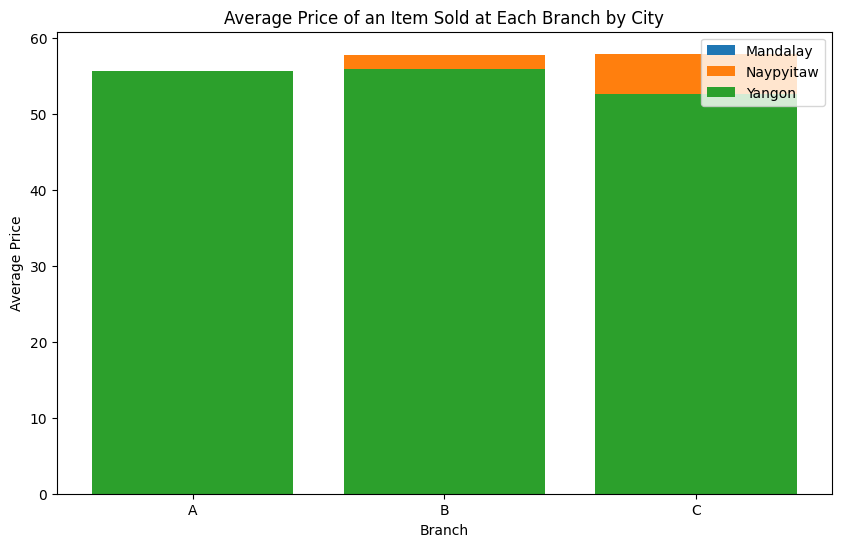

In [48]:
plt.figure(figsize=(10, 6))
for city in average_price_per_branch_city['City'].unique():
    city_data = average_price_per_branch_city[average_price_per_branch_city['City'] == city]
    plt.bar(city_data['Branch'], city_data['Unit price'], label=city)

plt.title('Average Price of an Item Sold at Each Branch by City')
plt.xlabel('Branch')
plt.ylabel('Average Price')
plt.legend()
plt.show()

# **C. MONTHLY PERFORMANCE**
______________________________

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [50]:
df['Month'] = df['Date'].dt.month

In [51]:
grouped_data = df.groupby(['Product line', 'Gender', 'Payment', 'Month']).agg({
    'Quantity': 'sum',
    'Total Revenue': 'sum'
}).reset_index()

#### *VISUALIZATION*

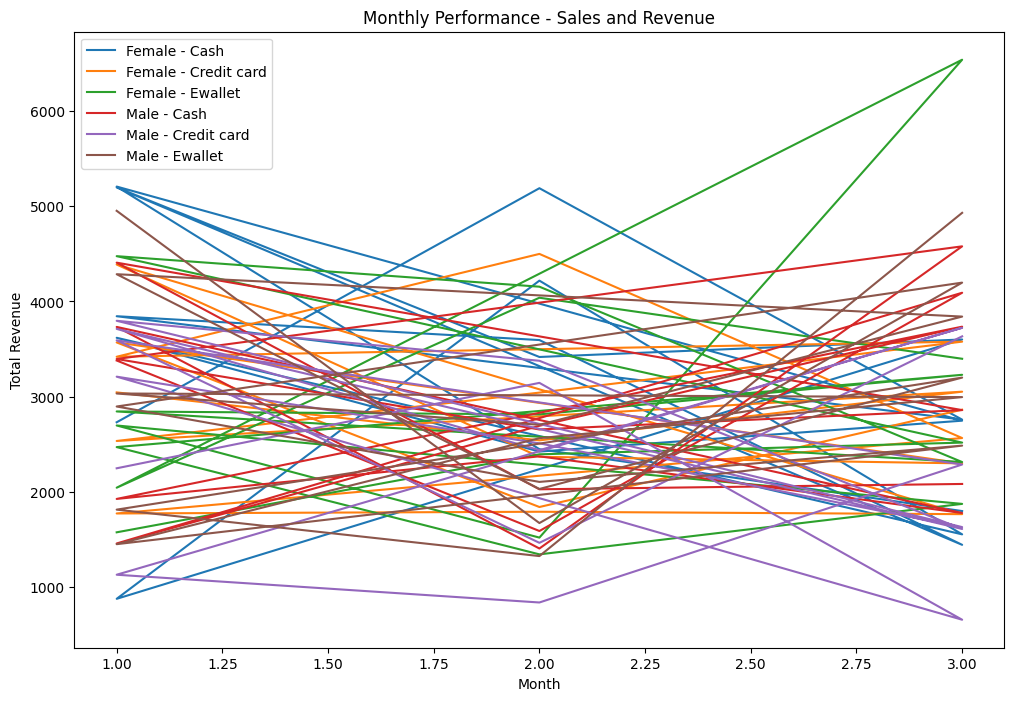

In [52]:
plt.figure(figsize=(12, 8))
for gender in grouped_data['Gender'].unique():
    for payment in grouped_data['Payment'].unique():
        subset = grouped_data[(grouped_data['Gender'] == gender) & (grouped_data['Payment'] == payment)]
        plt.plot(subset['Month'], subset['Total Revenue'], label=f'{gender} - {payment}')

plt.title('Monthly Performance - Sales and Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.legend()
plt.show()

### **SALES FOR APRIL 2019**
____________________________________

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.strftime('%Y-%m')
april_data = df[df['Month'] == '2019-04']

In [10]:
monthly_performance = df.groupby(['Month', 'Product line', 'Gender', 'Payment']).agg({
    'Total Revenue': 'sum',
    'Quantity': 'sum'
}).reset_index()

#### *TOTAL REVENUE PER PRODUCT*

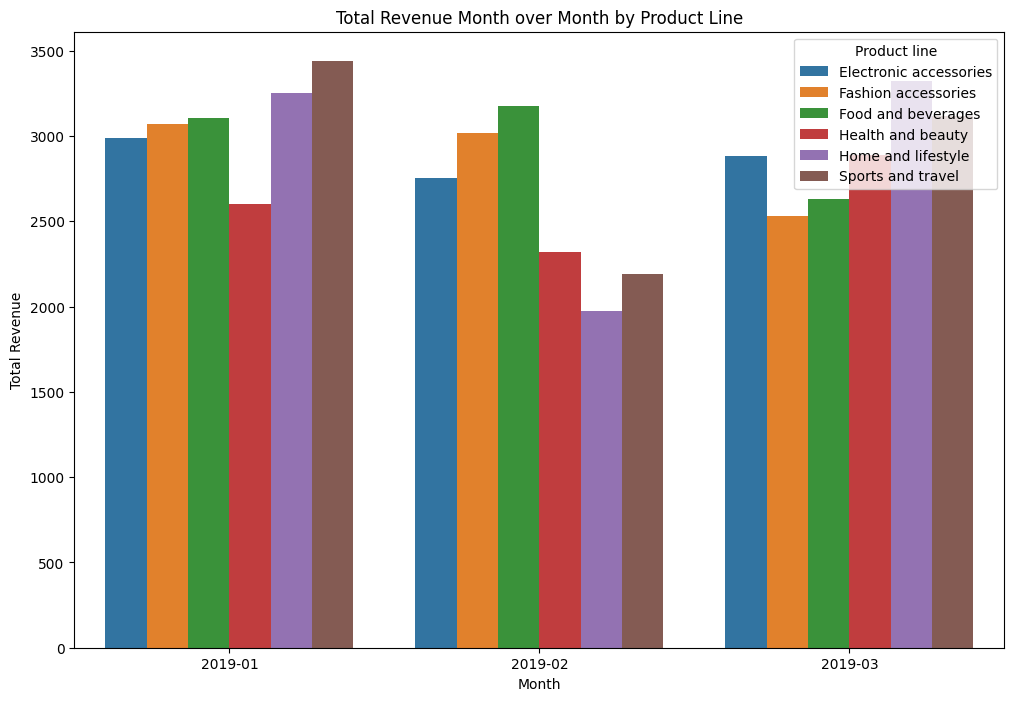

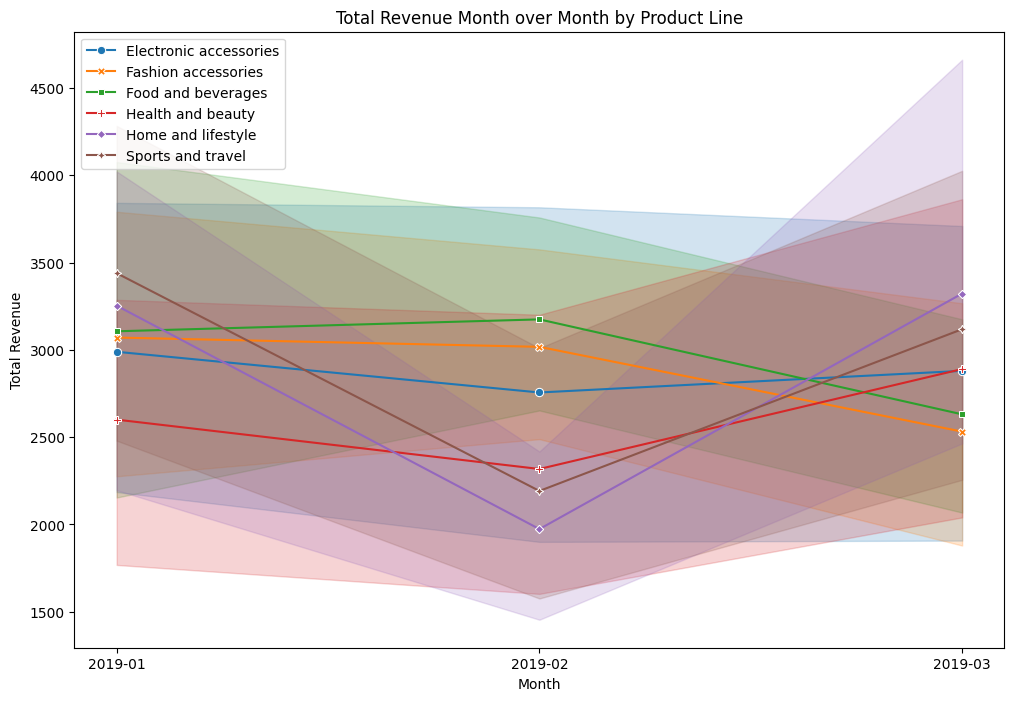

In [34]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Month', y='Total Revenue', hue='Product line', data=monthly_performance, errorbar=None)
plt.title('Total Revenue Month over Month by Product Line')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

plt.figure(figsize=(12, 8))
sns.lineplot(x='Month', y='Total Revenue', hue='Product line', style='Product line', markers=True, dashes=False, data=monthly_performance)
plt.title('Total Revenue Month over Month by Product Line')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.legend(loc='upper left')
plt.show()

#### *TOTAL SALES PER PRODUCT*

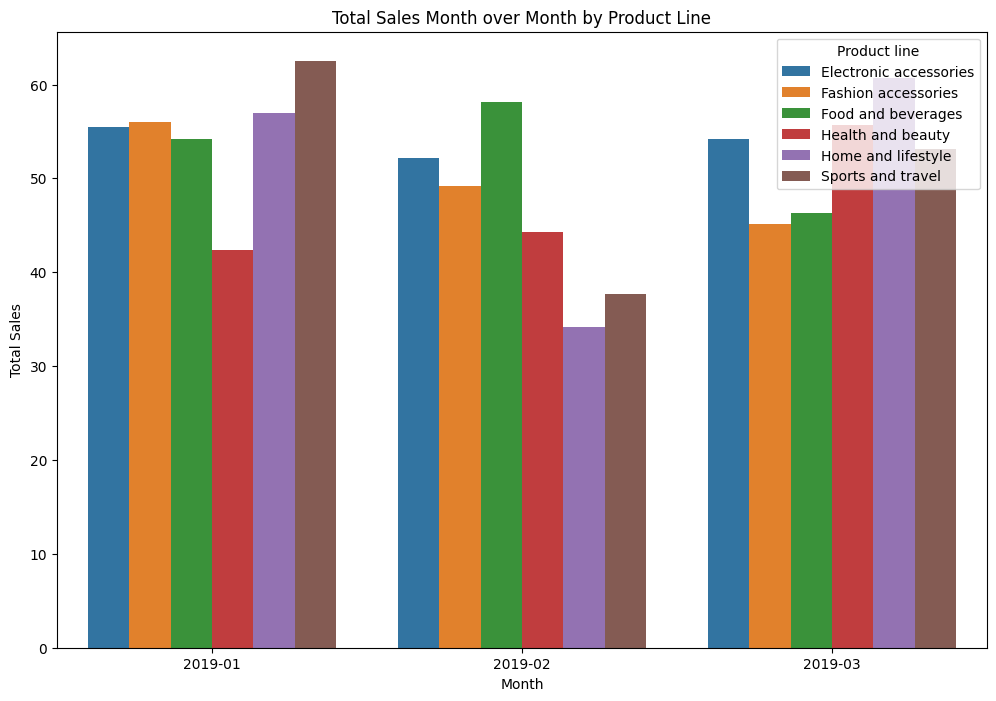

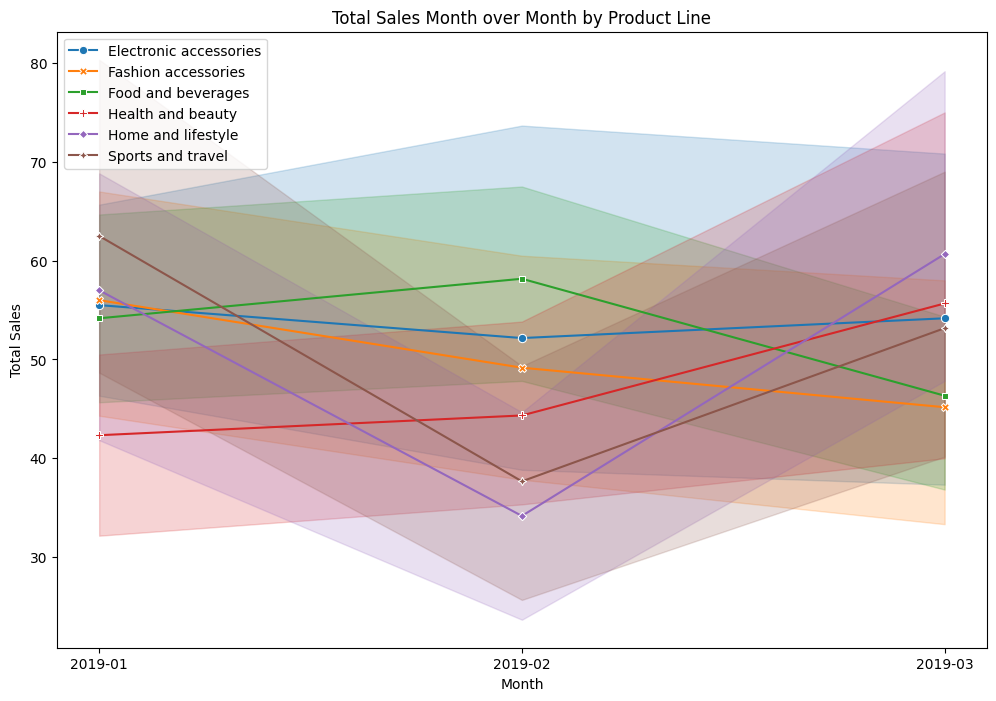

In [35]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Month', y='Quantity', hue='Product line', data=monthly_performance, errorbar=None)
plt.title('Total Sales Month over Month by Product Line')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

plt.figure(figsize=(12, 8))
sns.lineplot(x='Month', y='Quantity', hue='Product line', style='Product line', markers=True, dashes=False, data=monthly_performance)
plt.title('Total Sales Month over Month by Product Line')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(loc='upper left')
plt.show()

#### *TOTAL REVENUE PER GENDER*

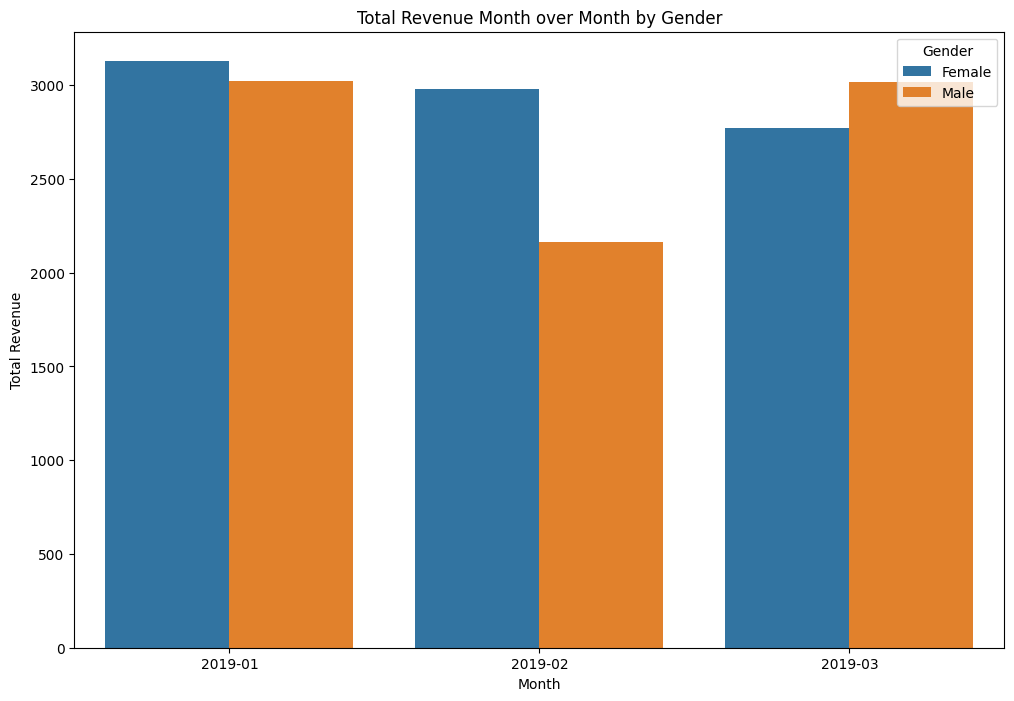

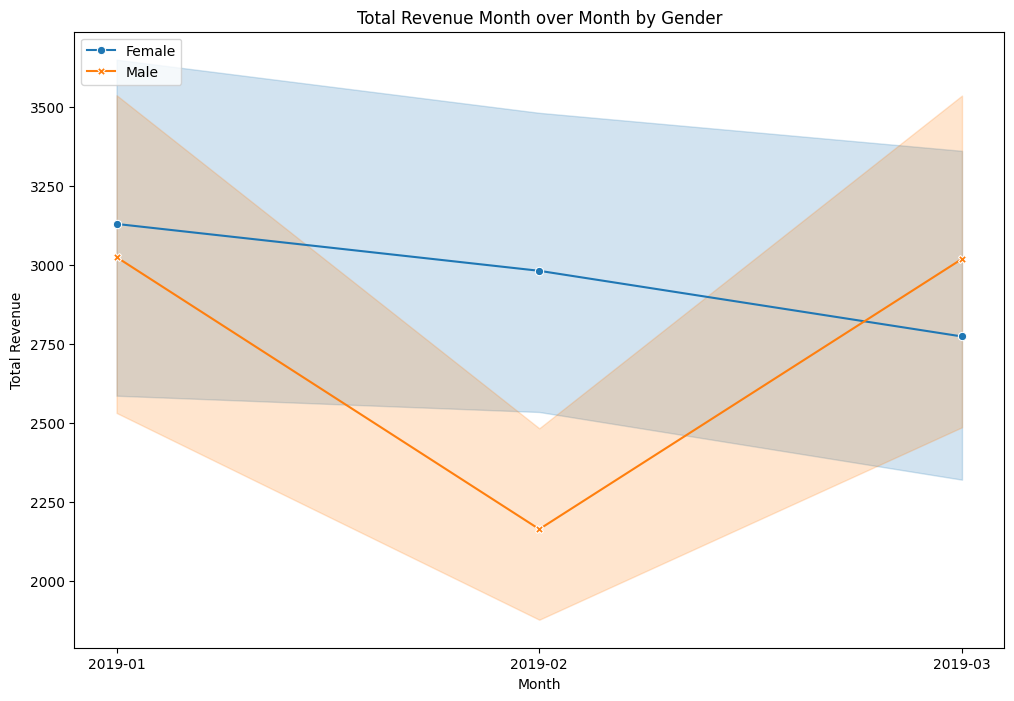

In [36]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Month', y='Total Revenue', hue='Gender', data=monthly_performance, errorbar=None)
plt.title('Total Revenue Month over Month by Gender')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

plt.figure(figsize=(12, 8))
sns.lineplot(x='Month', y='Total Revenue', hue='Gender', style='Gender', markers=True, dashes=False, data=monthly_performance)
plt.title('Total Revenue Month over Month by Gender')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.legend(loc='upper left')
plt.show()

#### *TOTAL SALES PER GENDER*

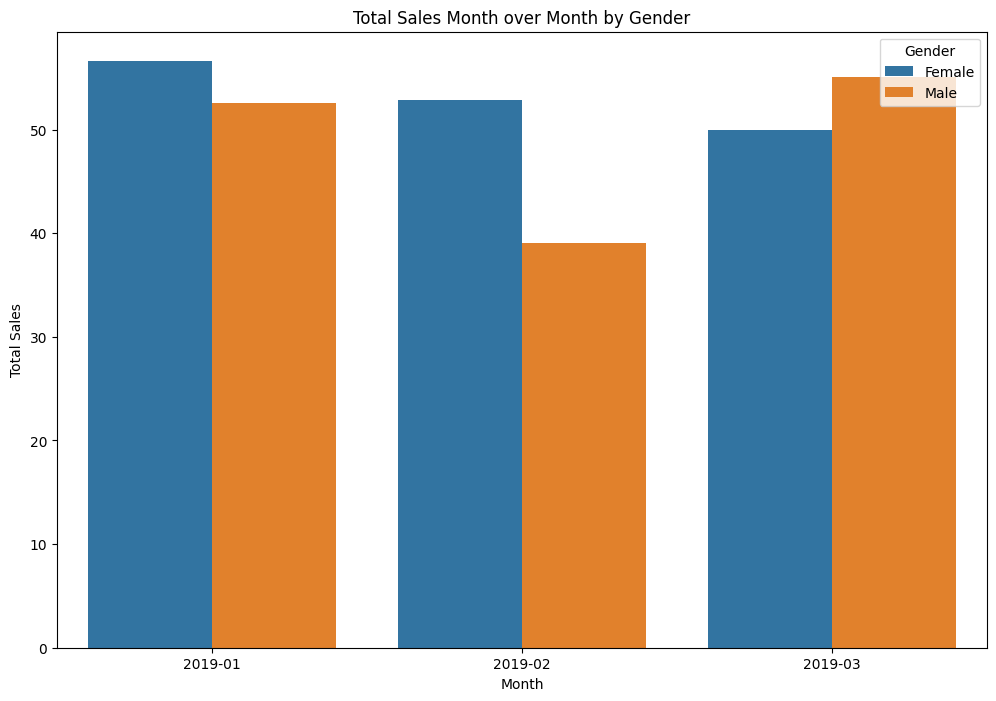

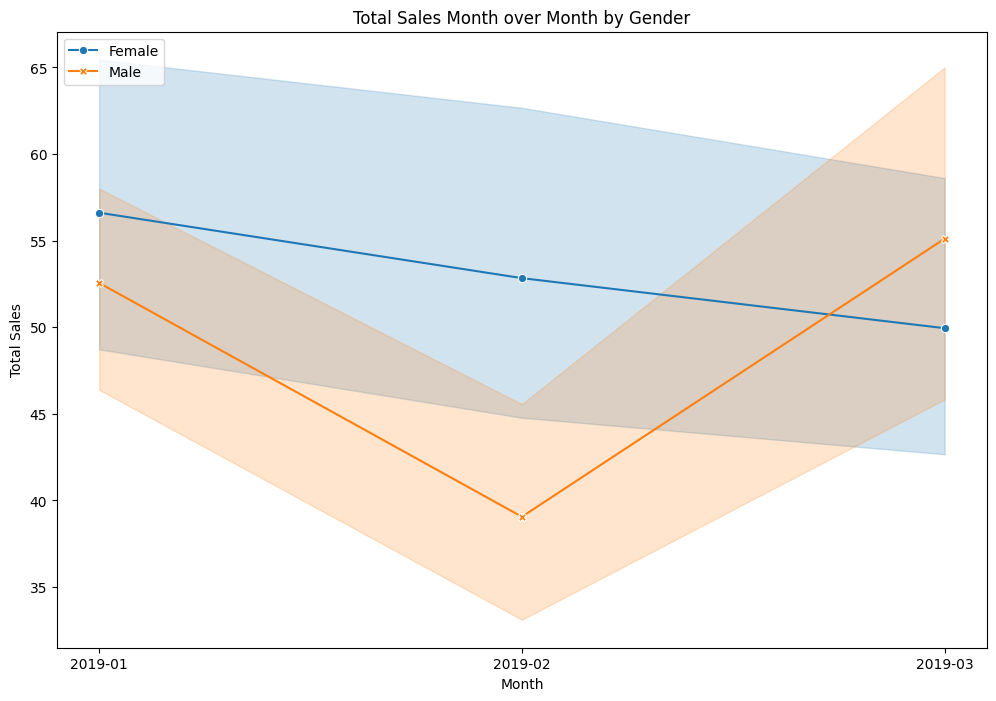

In [37]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Month', y='Quantity', hue='Gender', data=monthly_performance, errorbar=None)
plt.title('Total Sales Month over Month by Gender')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

plt.figure(figsize=(12, 8))
sns.lineplot(x='Month', y='Quantity', hue='Gender', style='Gender', markers=True, dashes=False, data=monthly_performance)
plt.title('Total Sales Month over Month by Gender')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(loc='upper left')
plt.show()

#### *PAYMENT MODE*

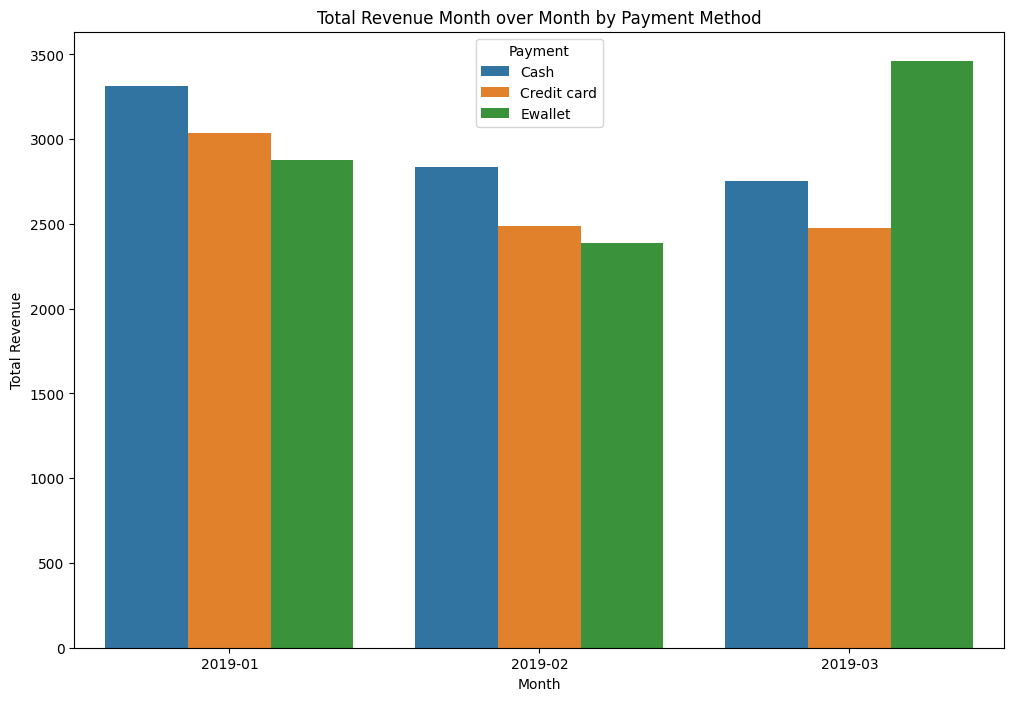

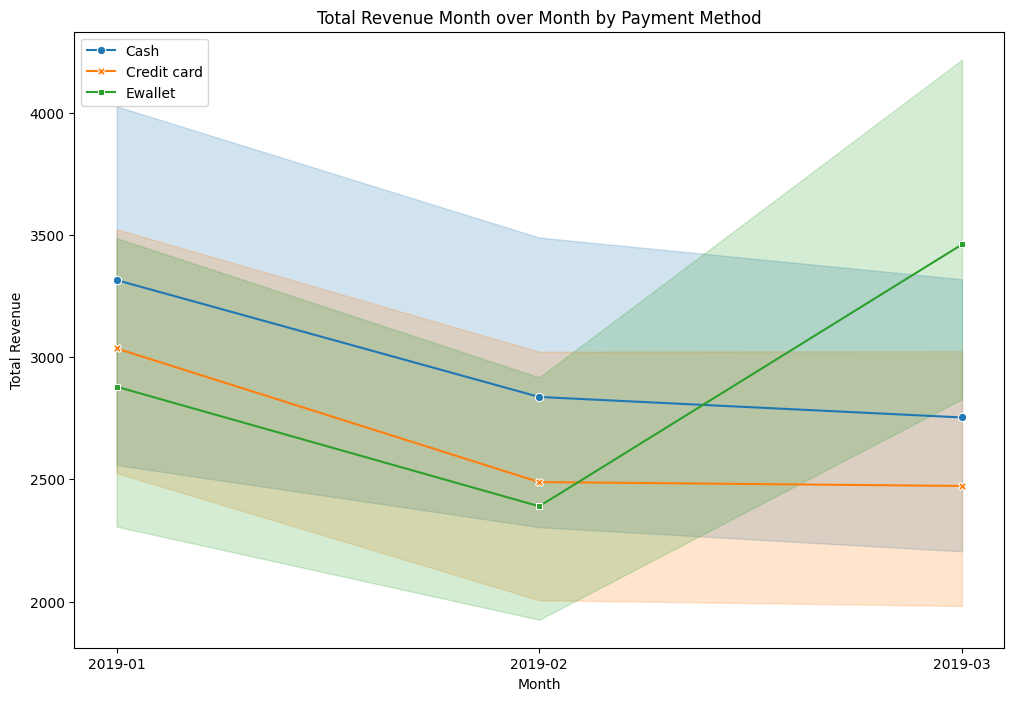

In [38]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Month', y='Total Revenue', hue='Payment', data=monthly_performance, errorbar=None)
plt.title('Total Revenue Month over Month by Payment Method')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

plt.figure(figsize=(12, 8))
sns.lineplot(x='Month', y='Total Revenue', hue='Payment', style='Payment', markers=True, dashes=False, data=monthly_performance)
plt.title('Total Revenue Month over Month by Payment Method')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.legend(loc='upper left')
plt.show()

#### *PAYMENT MODE PER QUANTITY*

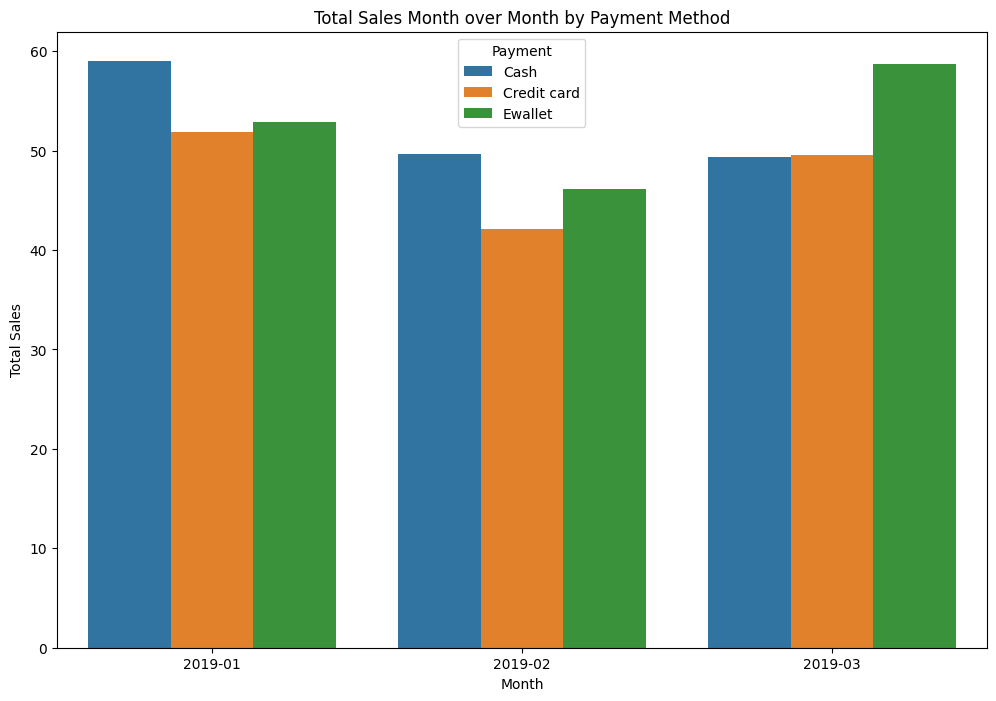

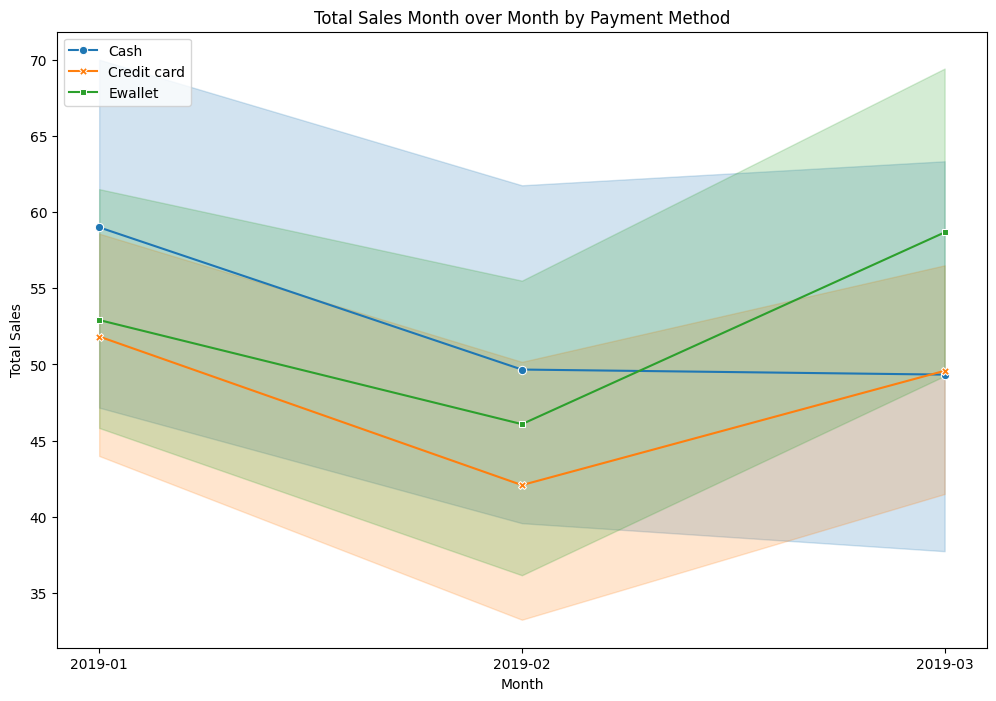

In [39]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Month', y='Quantity', hue='Payment', data=monthly_performance, errorbar=None)
plt.title('Total Sales Month over Month by Payment Method')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

plt.figure(figsize=(12, 8))
sns.lineplot(x='Month', y='Quantity', hue='Payment', style='Payment', markers=True, dashes=False, data=monthly_performance)
plt.title('Total Sales Month over Month by Payment Method')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(loc='upper left')
plt.show()